# 1. 문제 정의

### 광고 비용으로 매출을 예측해보자

### 지도학습 / 회귀

# 2. 데이터 수집

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
del data['Unnamed: 0']
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


# 3. 데이터 전처리

In [7]:
X=data.iloc[:,:3]
X.shape

(200, 3)

In [10]:
y=data.iloc[:,3]
y.shape

(200,)

# 4. EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

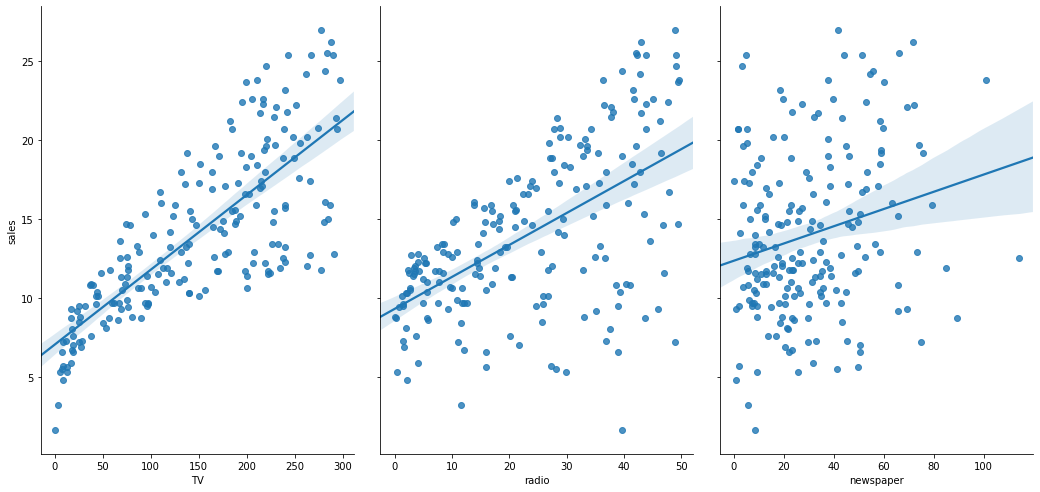

In [15]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

# 5. 모델 선택, 학습, 평가

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [19]:
X_train.shape

(140, 3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

계수: [0.04391531 0.20027962 0.00184368]
절편: 2.880255286331323


# y = 0.044 * TV + 0.2 * Radio + 0.002 * Newspaper + 2.88

훈련 세트 점수: 0.9065727532450597
테스트 세트 점수: 0.8649018906637792


훈련 세트 점수: 0.9065727532450597
테스트 세트 점수: 0.8649018906637792


## - RMSE

MSE:3.691394845698608, RMSE:1.9213003007595164


# 가장 영향력이 없는 신문을 지워보자(살짝오름)

(200, 2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

계수: [0.04396652 0.20099526]
절편: 2.909895690512924


훈련 세트 점수: 0.9065235649327258
테스트 세트 점수: 0.8656552691810044


MSE:3.670809675491495, RMSE:1.9159357179956469


# 더 향상 시킬수 있는 방법은?

(200, 5)


,TV,Radio,TVxTV,TVxRadio,RadioxRadio
1,230.1,37.8,52946.01,8697.78,1428.84
2,44.5,39.3,1980.25,1748.85,1544.49
3,17.2,45.9,295.84,789.48,2106.81
4,151.5,41.3,22952.25,6256.95,1705.69
5,180.8,10.8,32688.64,1952.64,116.64


훈련 세트 점수: 0.9912495632936611
테스트 세트 점수: 0.9729857942978335


0.8591454934312549

# 스케일링(교재 3장 코드참조)
- StandardScaler : 평균을 0, 분산을 1로 변경하여 같은 크기를 가지게 됨
- RobustScaler : 중앙값과 사분위값을 사용하여 특성들이 같은 스케일을 갖게 됨(이상치에 영향받지않음)
- MinMaxScaler : 모든특성이 정확하게 0과 1사이에 위치
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 조절

훈련 세트 점수: 0.98
테스트 세트 점수: 0.993
RMSE 점수: 0.41519


# 교차검증 대입

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

CAUTION_ 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대합니다. 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수를 사용합니다. 이런 이유로 앞선 코드에서 제곱근을 계산하기 전에 -scores로 부호를 바꿨습니다.50

alpha : 1e-07 	점수 : 0.7340669412921635
alpha : 1e-06 	점수 : 0.7340669378655817
alpha : 1e-05 	점수 : 0.7340669036052879
alpha : 0.0001 	점수 : 0.7340665615541336
alpha : 0.001 	점수 : 0.7340631961886385
alpha : 0.01 	점수 : 0.734035024521622
alpha : 0.1 	점수 : 0.7342701951173642
alpha : 1 	점수 : 0.766750620275197
alpha : 10 	점수 : 1.1257640236397652
alpha : 100 	점수 : 1.9534142266943841
alpha : 1000 	점수 : 4.1443258861104555


alpha : 1e-07 	점수 : 0.7340668838399427
alpha : 1e-06 	점수 : 0.7340663622050367
alpha : 1e-05 	점수 : 0.7340611547120386
alpha : 0.0001 	점수 : 0.7340099856099159
alpha : 0.001 	점수 : 0.7338880335560243
alpha : 0.01 	점수 : 0.7394324983867261
alpha : 0.1 	점수 : 1.0847067962588484
alpha : 1 	점수 : 1.535707027121512
alpha : 10 	점수 : 5.294955031751007
alpha : 100 	점수 : 5.294955031751007
alpha : 1000 	점수 : 5.294955031751007
alpha : 10000 	점수 : 5.294955031751007


# 데이터 컬럼 더 많이 증가(실제로 오르지는 않음)

C:\Anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TV,Radio,TV2,Radio2,TV3,Radio3,TV4,Radio4,TV5,Radio5,TV6,Radio6
1,230.1,37.8,52946.01,1428.84,1.218288e+07,54010.152,2.803280e+09,2.041584e+06,6.450347e+11,7.717187e+07,1.484225e+14,2.917097e+09
2,44.5,39.3,1980.25,1544.49,8.812112e+04,60698.457,3.921390e+06,2.385449e+06,1.745019e+08,9.374816e+07,7.765333e+09,3.684303e+09
3,17.2,45.9,295.84,2106.81,5.088448e+03,96702.579,8.752131e+04,4.438648e+06,1.505366e+06,2.037340e+08,2.589230e+07,9.351389e+09
4,151.5,41.3,22952.25,1705.69,3.477266e+06,70444.997,5.268058e+08,2.909378e+06,7.981108e+10,1.201573e+08,1.209138e+13,4.962498e+09
5,180.8,10.8,32688.64,116.64,5.910106e+06,1259.712,1.068547e+09,1.360489e+04,1.931933e+11,1.469328e+05,3.492935e+13,1.586874e+06


훈련 세트 점수: 0.94
테스트 세트 점수: 0.905
테스트 세트 점수: 1.60932


훈련 세트 점수: 0.94
테스트 세트 점수: 0.905
테스트 세트 점수: 1.60932


array([ 1.97178247e-01, -1.37711204e+00, -2.19265351e-03,  2.59342558e-01,
        1.76849733e-05, -1.84939989e-02, -8.41172499e-08,  6.48280134e-04,
        2.12360718e-10, -1.09876515e-05, -2.17381668e-13,  7.19371970e-08])

훈련 세트 점수: 0.94
테스트 세트 점수: 0.905
테스트 세트 점수: 1.60932


array([ 1.97178247e-01, -1.37711204e+00, -2.19265351e-03,  2.59342558e-01,
        1.76849733e-05, -1.84939989e-02, -8.41172499e-08,  6.48280134e-04,
        2.12360718e-10, -1.09876515e-05, -2.17381668e-13,  7.19371970e-08])